In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time

%matplotlib inline

In [2]:
df = pd.read_csv('../data/creditcard.csv')
print('Number of samples: %d' % df.shape[0])
df.head()

Number of samples: 284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Counts
0    284315
1       492
Name: Class, dtype: int64
Relative counts
0    0.998273
1    0.001727
Name: Class, dtype: float64


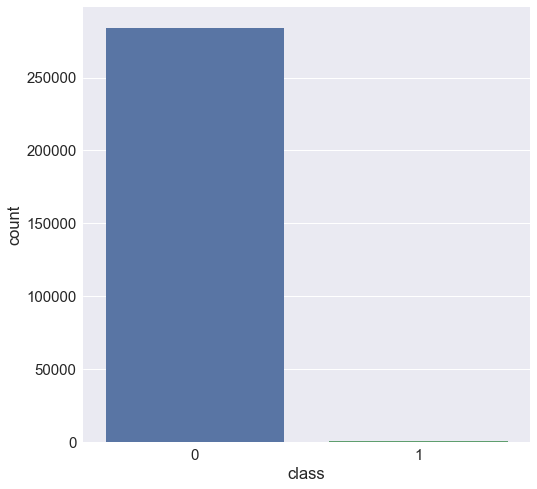

In [3]:
count_classes = pd.value_counts(df['Class'], sort=True).sort_index()
print('Counts')
print(count_classes)
print('Relative counts')
print(count_classes / len(df))
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
sns.countplot(x='Class', data=df)
plt.xlabel('class')
plt.show()

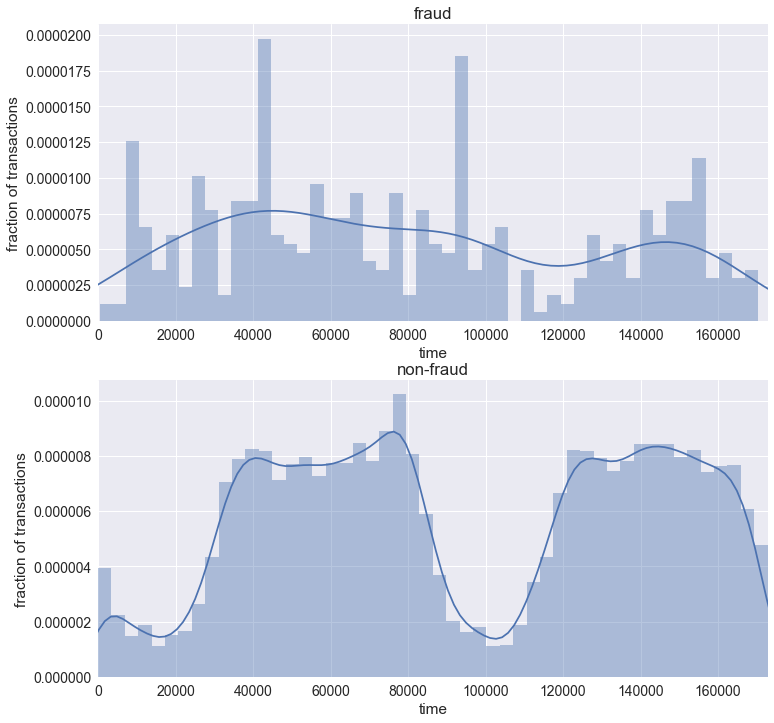

In [4]:
bins = 50

sns.set(font_scale=1.4)
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
sns.distplot(df.Time[df.Class == 1], bins=bins).set(xlim=(0, df.Time.max()))
plt.title('fraud')
plt.ylabel('fraction of transactions')
plt.xlabel('time')

plt.subplot(2, 1, 2)
sns.distplot(df.Time[df.Class == 0], bins=bins).set(xlim=(0, df.Time.max()))
plt.title('non-fraud')
plt.xlabel('time')
plt.ylabel('fraction of transactions')
plt.show()

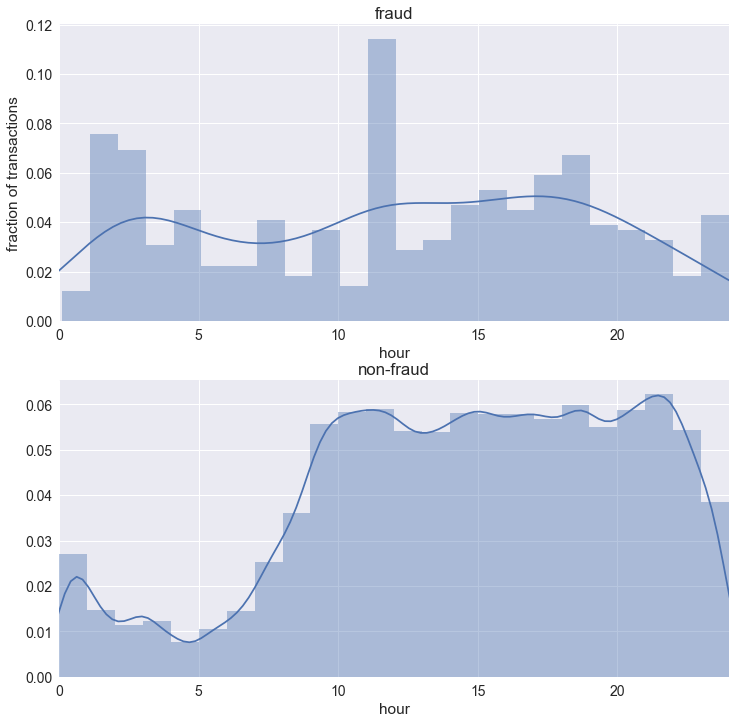

In [5]:
tmp = pd.DataFrame.copy(df)
sec_day = 24*60*60
tmp['dayTime'] = tmp.Time
tmp.loc[tmp.dayTime > sec_day] -= sec_day
tmp.dayTime /= 60*60

bins = 24

sns.set(font_scale=1.4)
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
sns.distplot(tmp.dayTime[df.Class == 1], bins=bins).set(xlim=(0, tmp.dayTime.max()))
plt.title('fraud')
plt.ylabel('fraction of transactions')
plt.xlabel('hour')

plt.subplot(2, 1, 2)
sns.distplot(tmp.dayTime[df.Class == 0], bins=bins).set(xlim=(0, tmp.dayTime.max()))
plt.title('non-fraud')
plt.xlabel('hour')
plt.show()

In [6]:
corr = df.corr()

print(corr.Class)

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


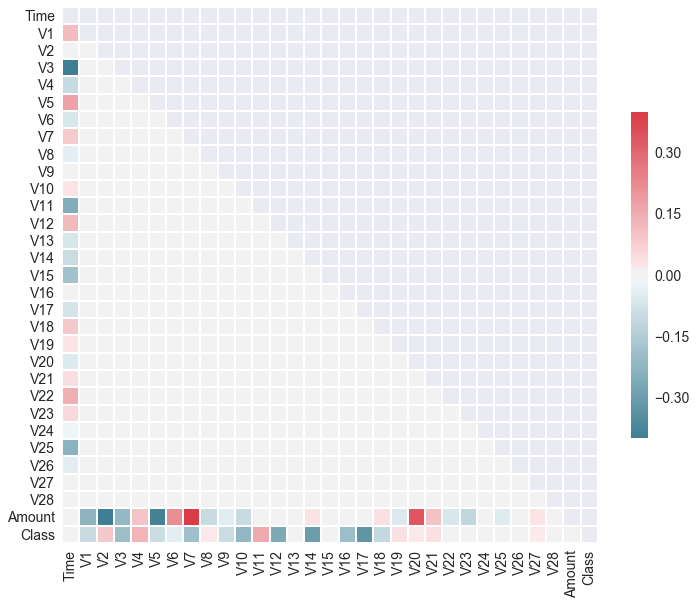

In [7]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.4,
            square=True, vmin=-0.4, 
            linewidths=1, cbar_kws={"shrink": 0.5}, ax=ax)

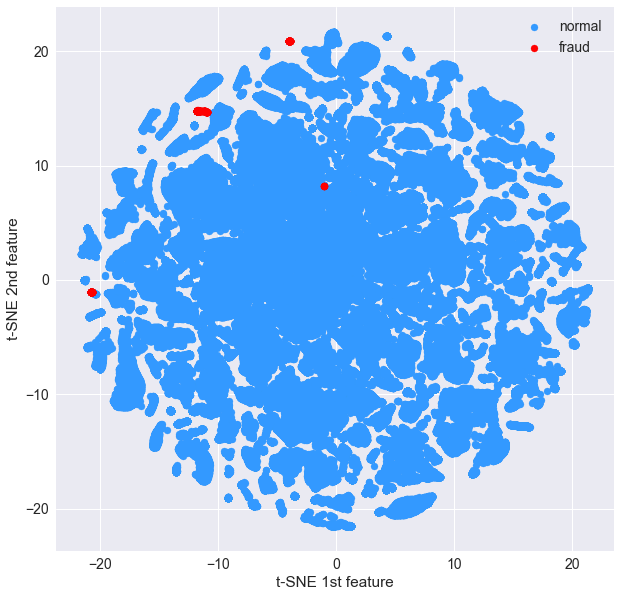

In [11]:
attr = np.load('tsne.npy')
color_map = {0:'#3399ff', 1:'red'}
plt.figure(figsize=(10, 10))
y = df.iloc[:, -1].values
for idx, label in enumerate(np.unique(y)):
    plt.scatter(attr[y == label, 0], 
                attr[y == label, 1], 
                c=color_map[idx], 
                label='fraud' if label == 1 else 'normal',
                alpha=1)
plt.xlabel('t-SNE 1st feature')
plt.ylabel('t-SNE 2nd feature')
plt.legend(loc='upper right')
plt.show()